<div align="center">
  <img src="logoinpe.png">
</div>


# Análise Estatística e Espectral de Processos Estocásticos (CAP-239-4)

<hr>

Docentes:
- Dr. Reinaldo Rosa
- Dr. Leonardo B. L. Santos

Discentes:
 - Fernando Cossetin;
 - Felipe Menino Carlos;
 - Felipe Perin.

**Atividade**: Análise e visualização inicial dos dados

**Descrição da atividade**: Utilizar técnicas de `Cullen-Frey`, `Histogramas` e `PDFs`: A partir do dataset do seu Team visualize, obtenha os respectivos Histogramas e PDFs para as seguintes variáveis: Número Total de Casos, Numero Total de Mortes, Numero Total De Testes, `Numero Diário de Casos (NDC)`, `Numero Diário de Mortes (NDM)`, `Numero Diário de Testes (NDT)`. Identifique semelhanças e discrepâncias entre os países. Este exercício é apenas para os dados da OWD. Implemente ainda uma análise de regressão linear em Python entre as variáveis: NDC e NDT para os países que apresentam PDF próximas.

<hr>

In [1]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('ggplot')

In [2]:
data_owd = pd.read_csv('../1_conjunto_de_dados/dataset/data/blueteam_international_update_2020_05_11.csv')
data_owd['date'] = pd.to_datetime(data_owd['date'])

### Visualização geral dos dados

Antes de iniciar a aplicação das técnicas sobre os conjuntos de dados, faz-se necessário a visualização destes, entendendo o comportamento de tais dados para cada país. Os tópicos abaixo apresentam esta visualização inicial.

* Número total de casos

In [3]:
countries = data_owd.groupby('iso_code')

In [4]:
NAMES = {
    'BRA': 'Brasil',
    'CAN': 'Canadá',
    'CUB': 'Cuba',
    'MEX': 'México',
    'RUS': 'Rússia'
}

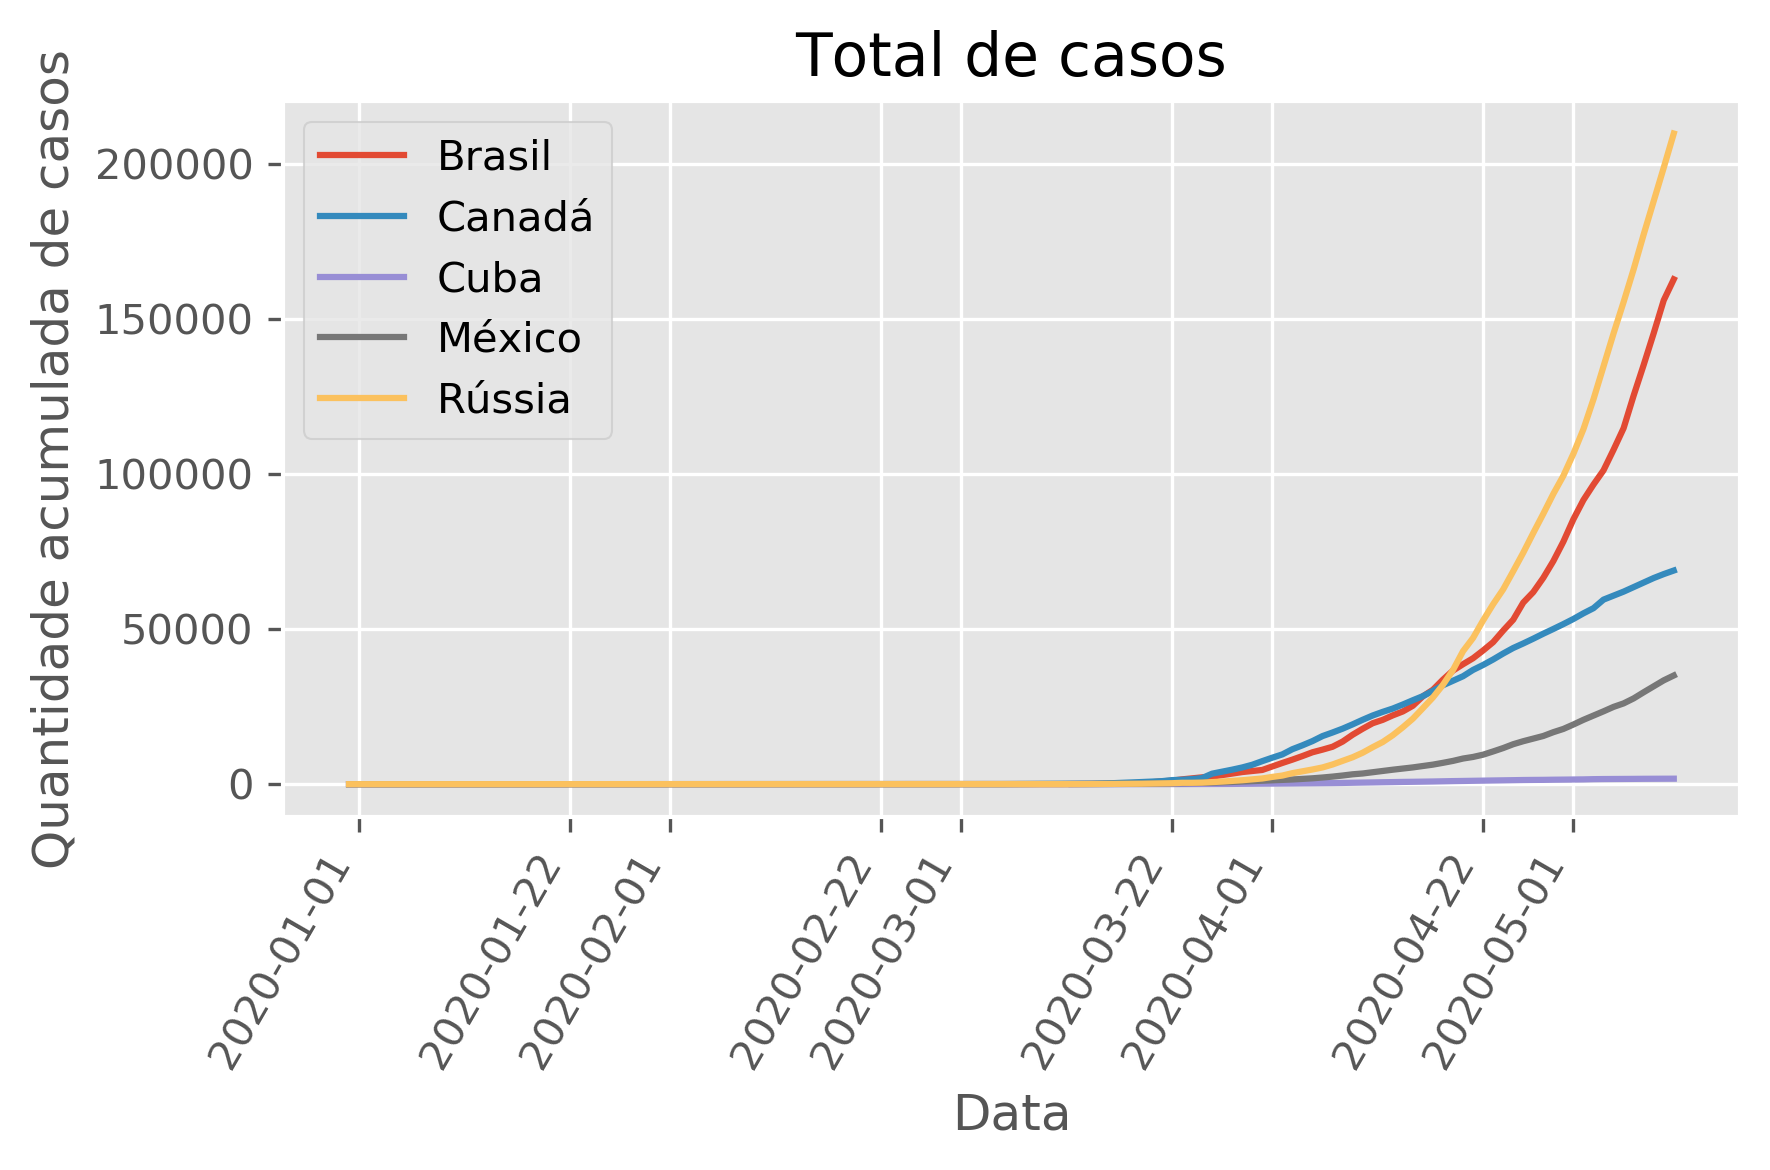

In [5]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de casos')
plt.title('Total de casos')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de mortes

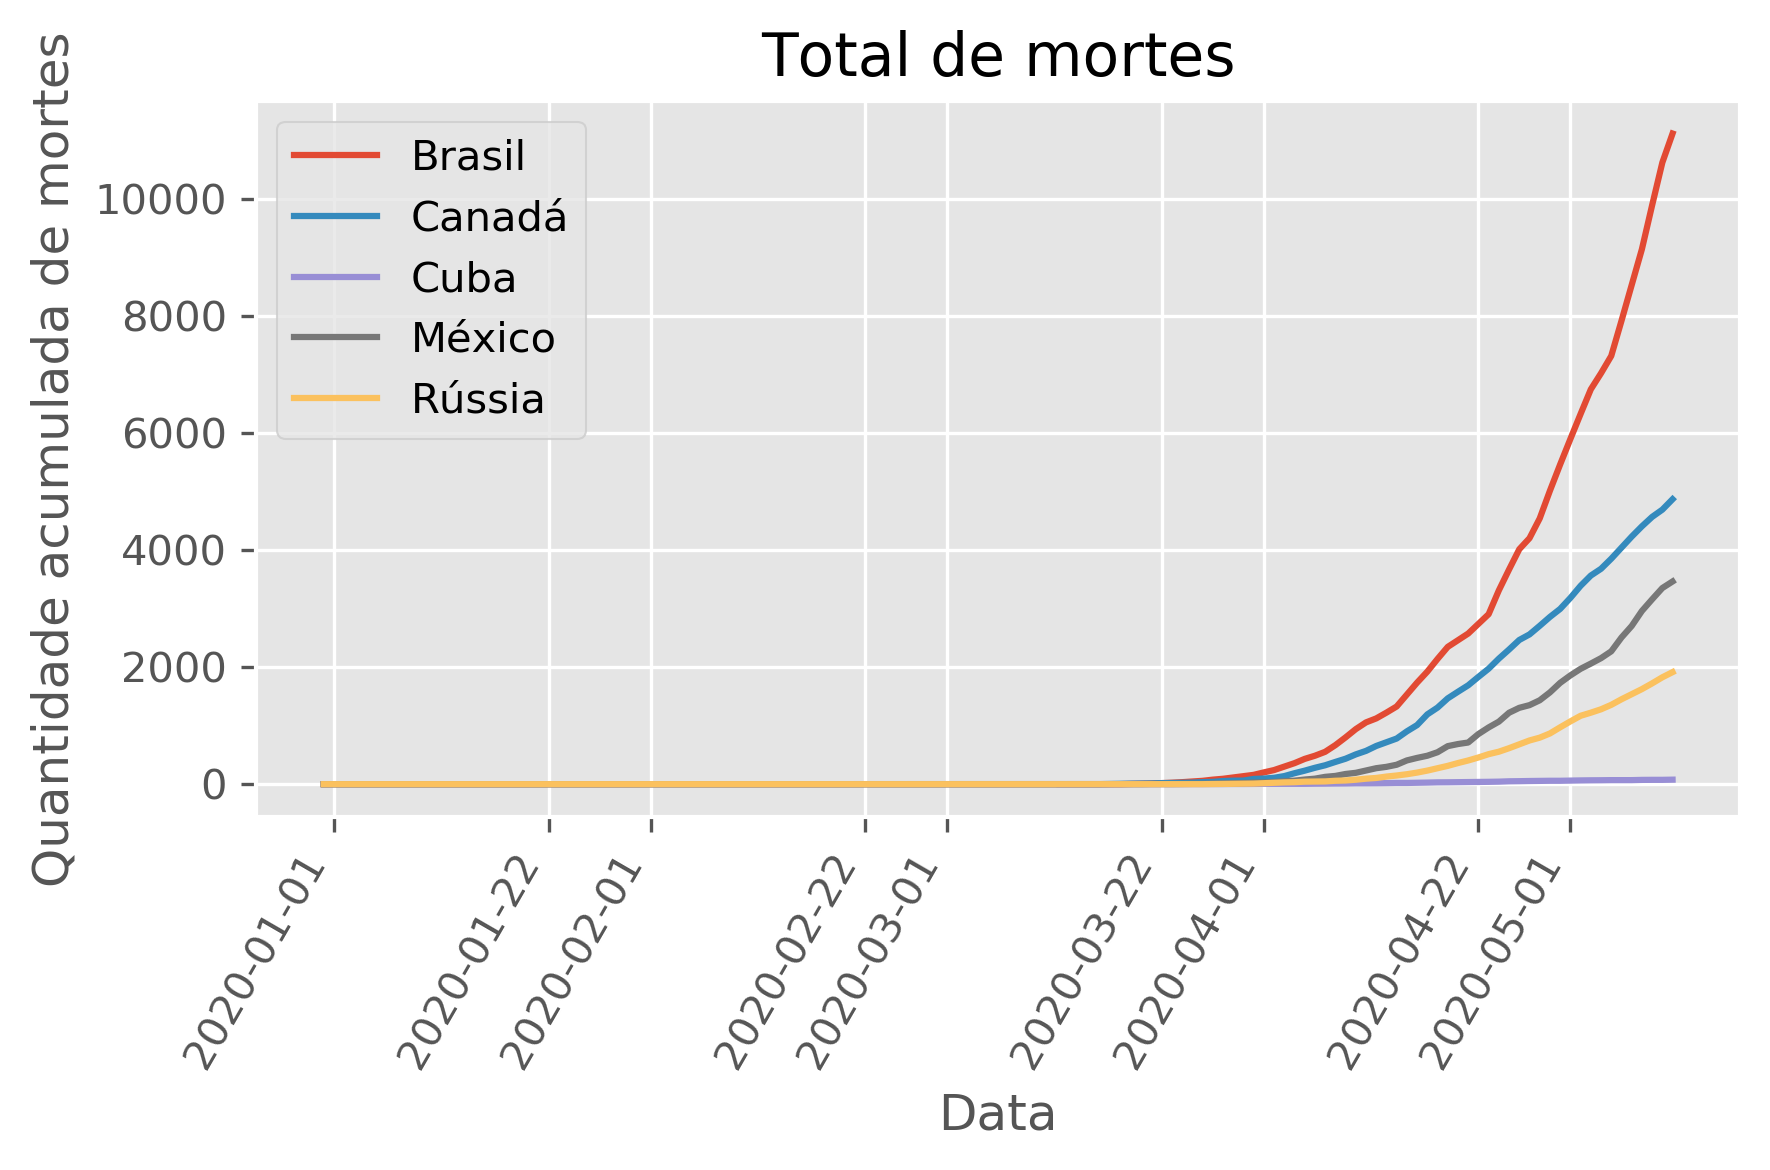

In [6]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de mortes')
plt.title('Total de mortes')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número total de testes (Em análise com o professor)

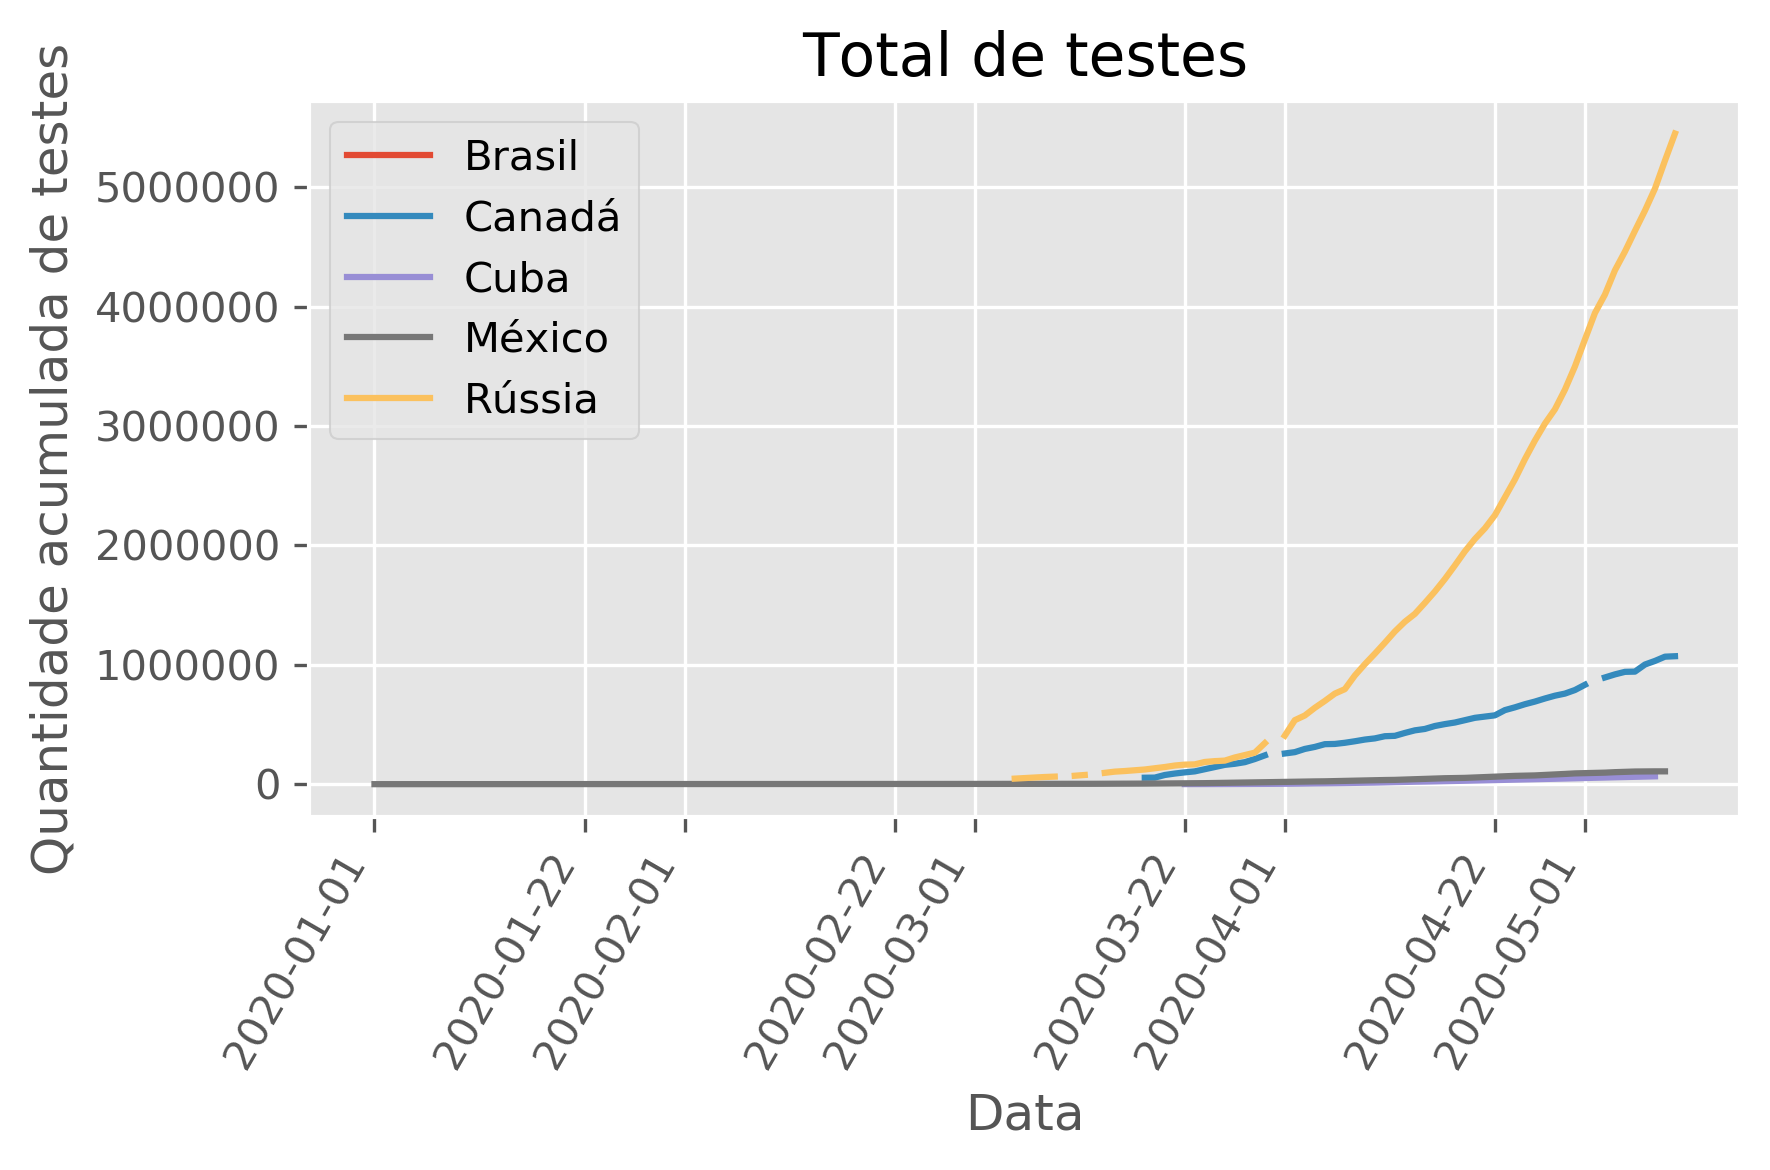

In [7]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.total_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade acumulada de testes')
plt.title('Total de testes')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

* Número diário de casos (NDC)


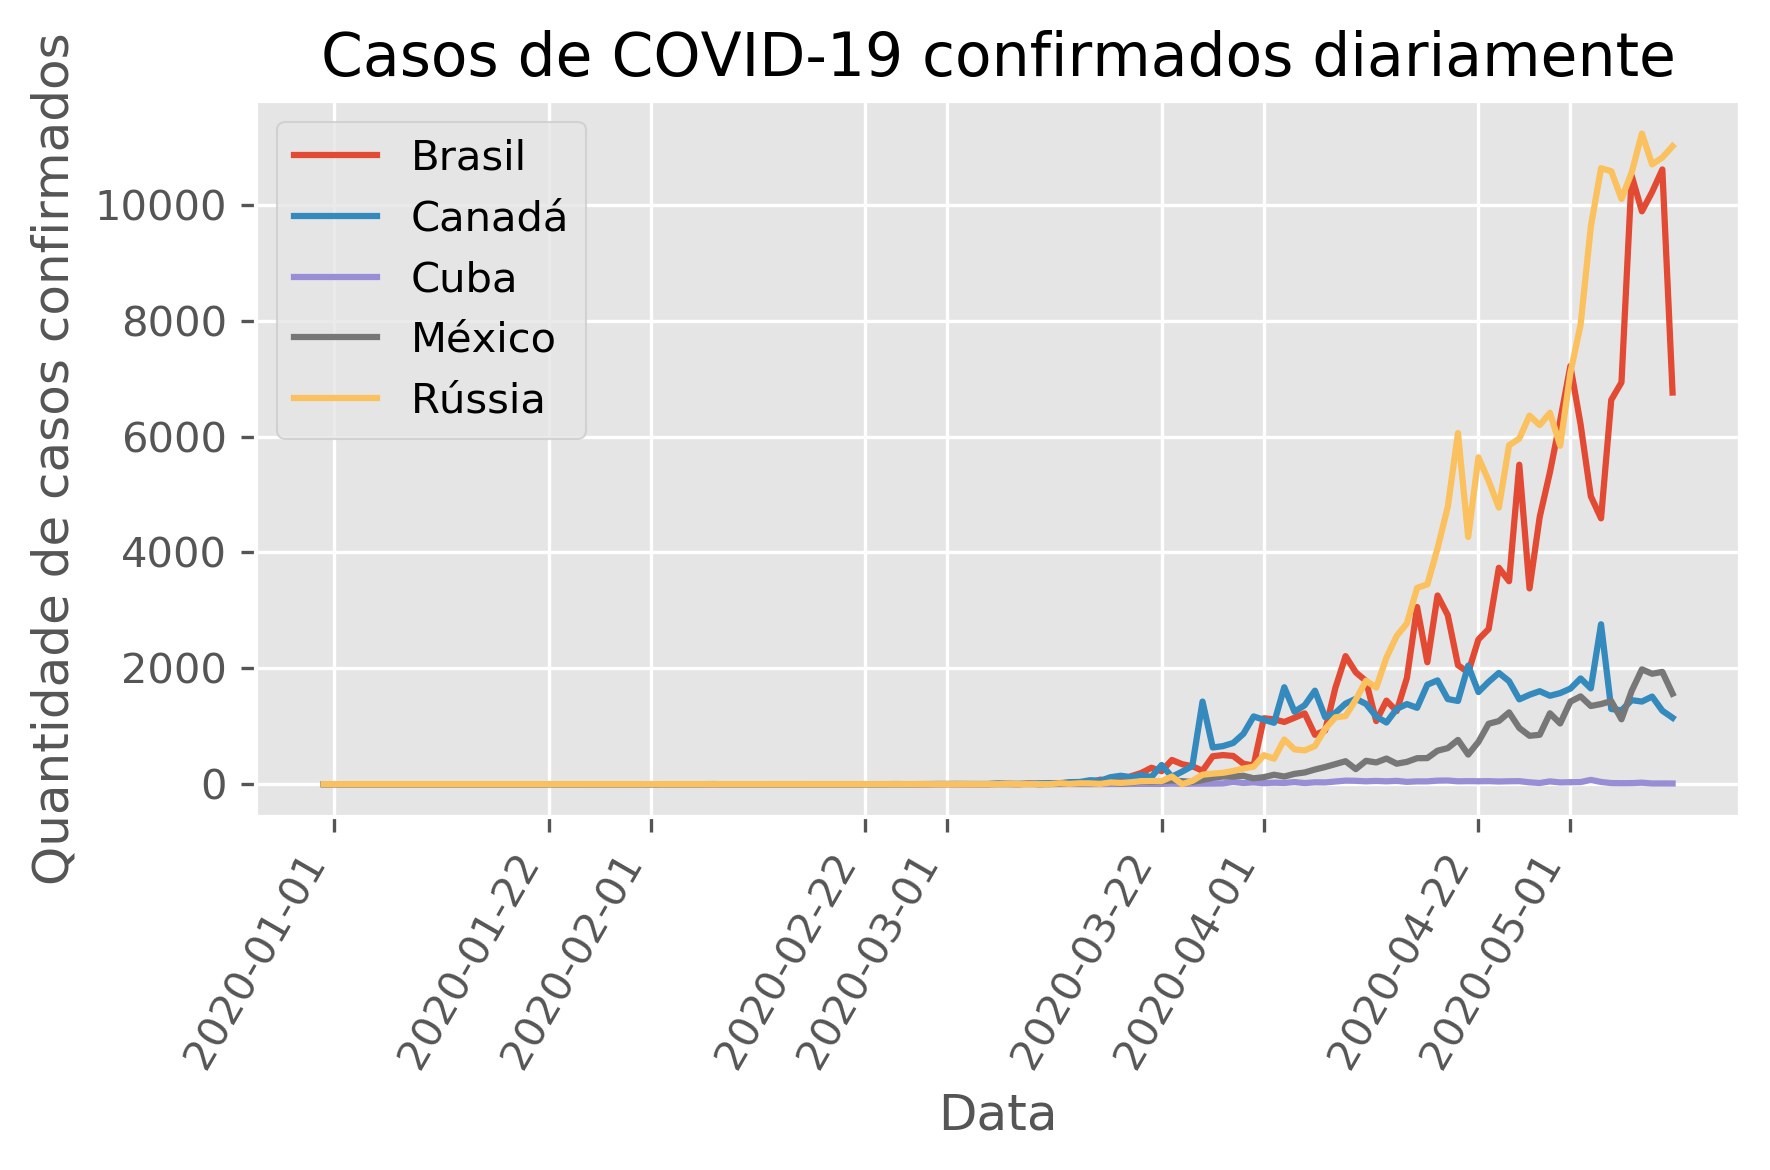

In [8]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_cases)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos confirmados')
plt.title('Casos de COVID-19 confirmados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de mortes (NDM)

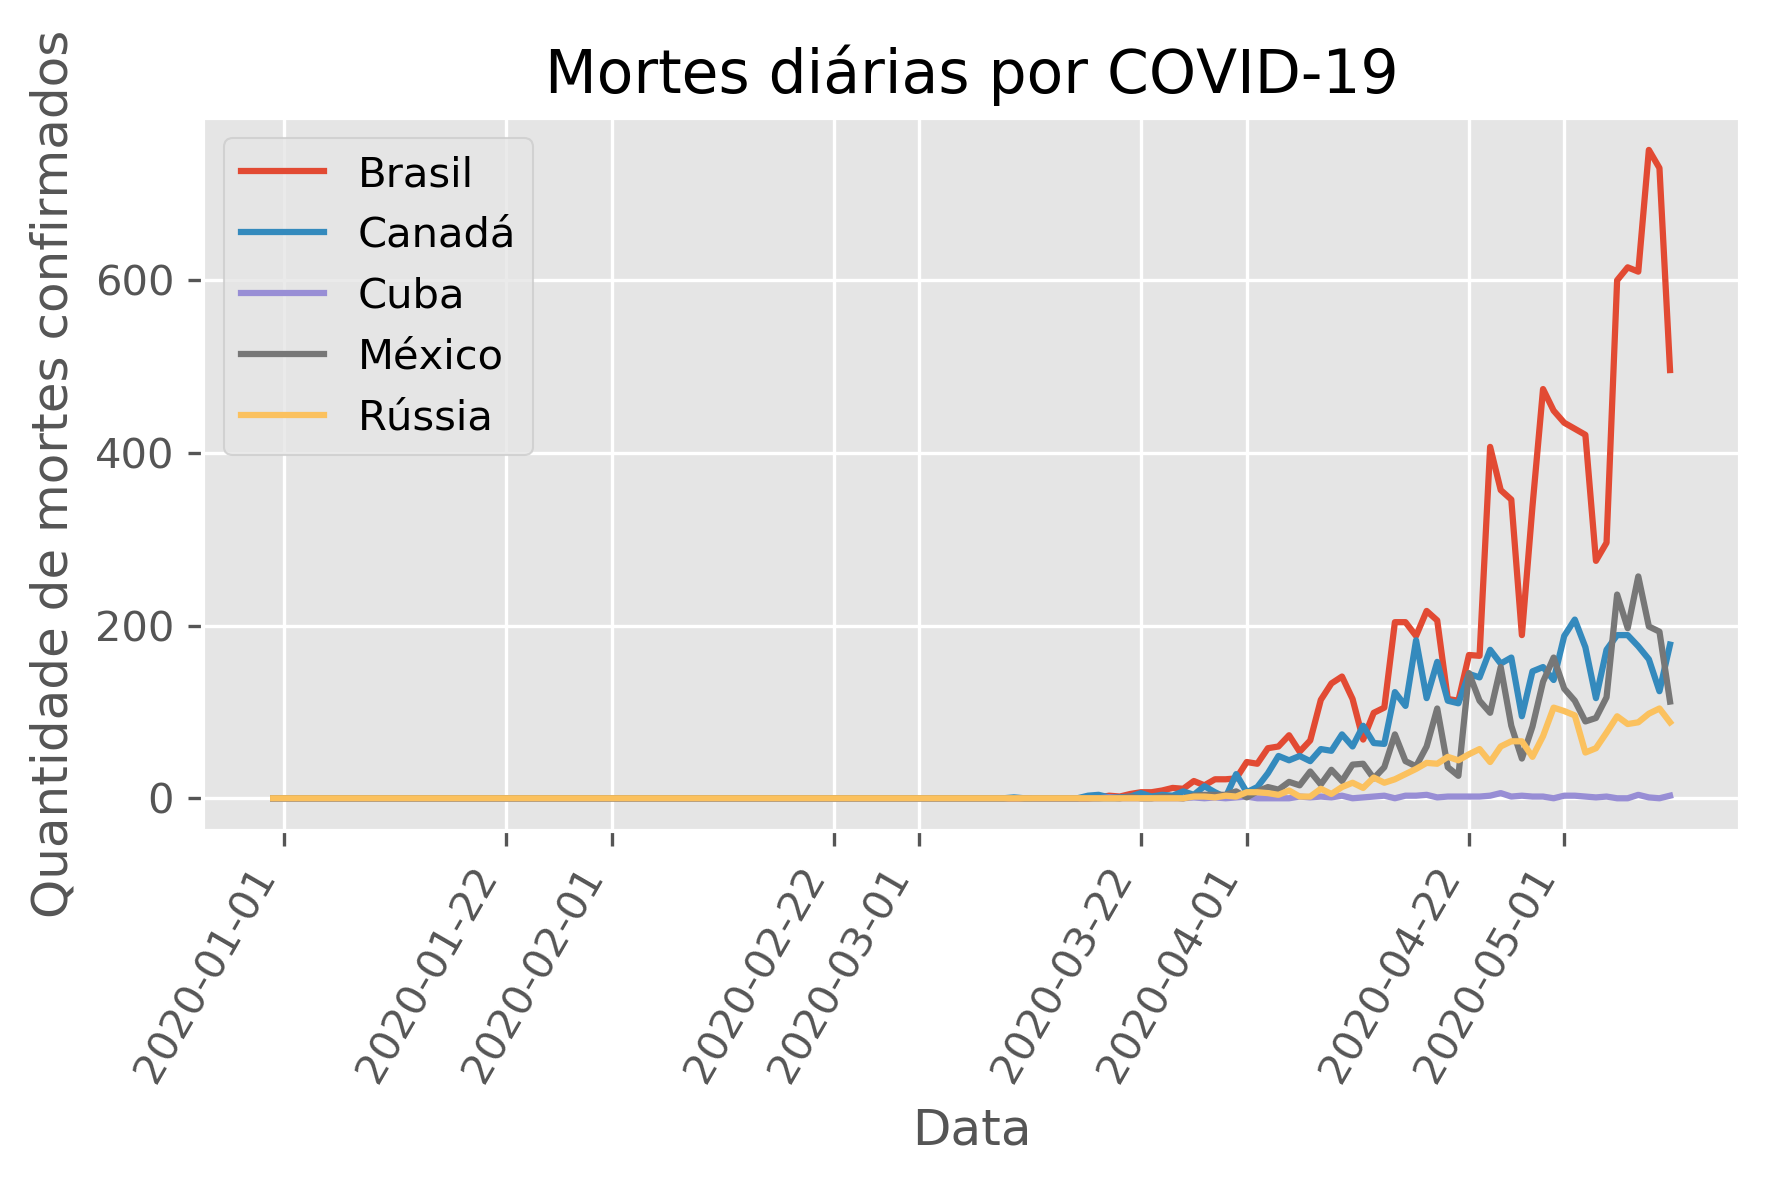

In [9]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_deaths)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de mortes confirmados')
plt.title('Mortes diárias por COVID-19')
plt.tight_layout()
plt.legend(legend)
plt.show()

* Número diário de testes

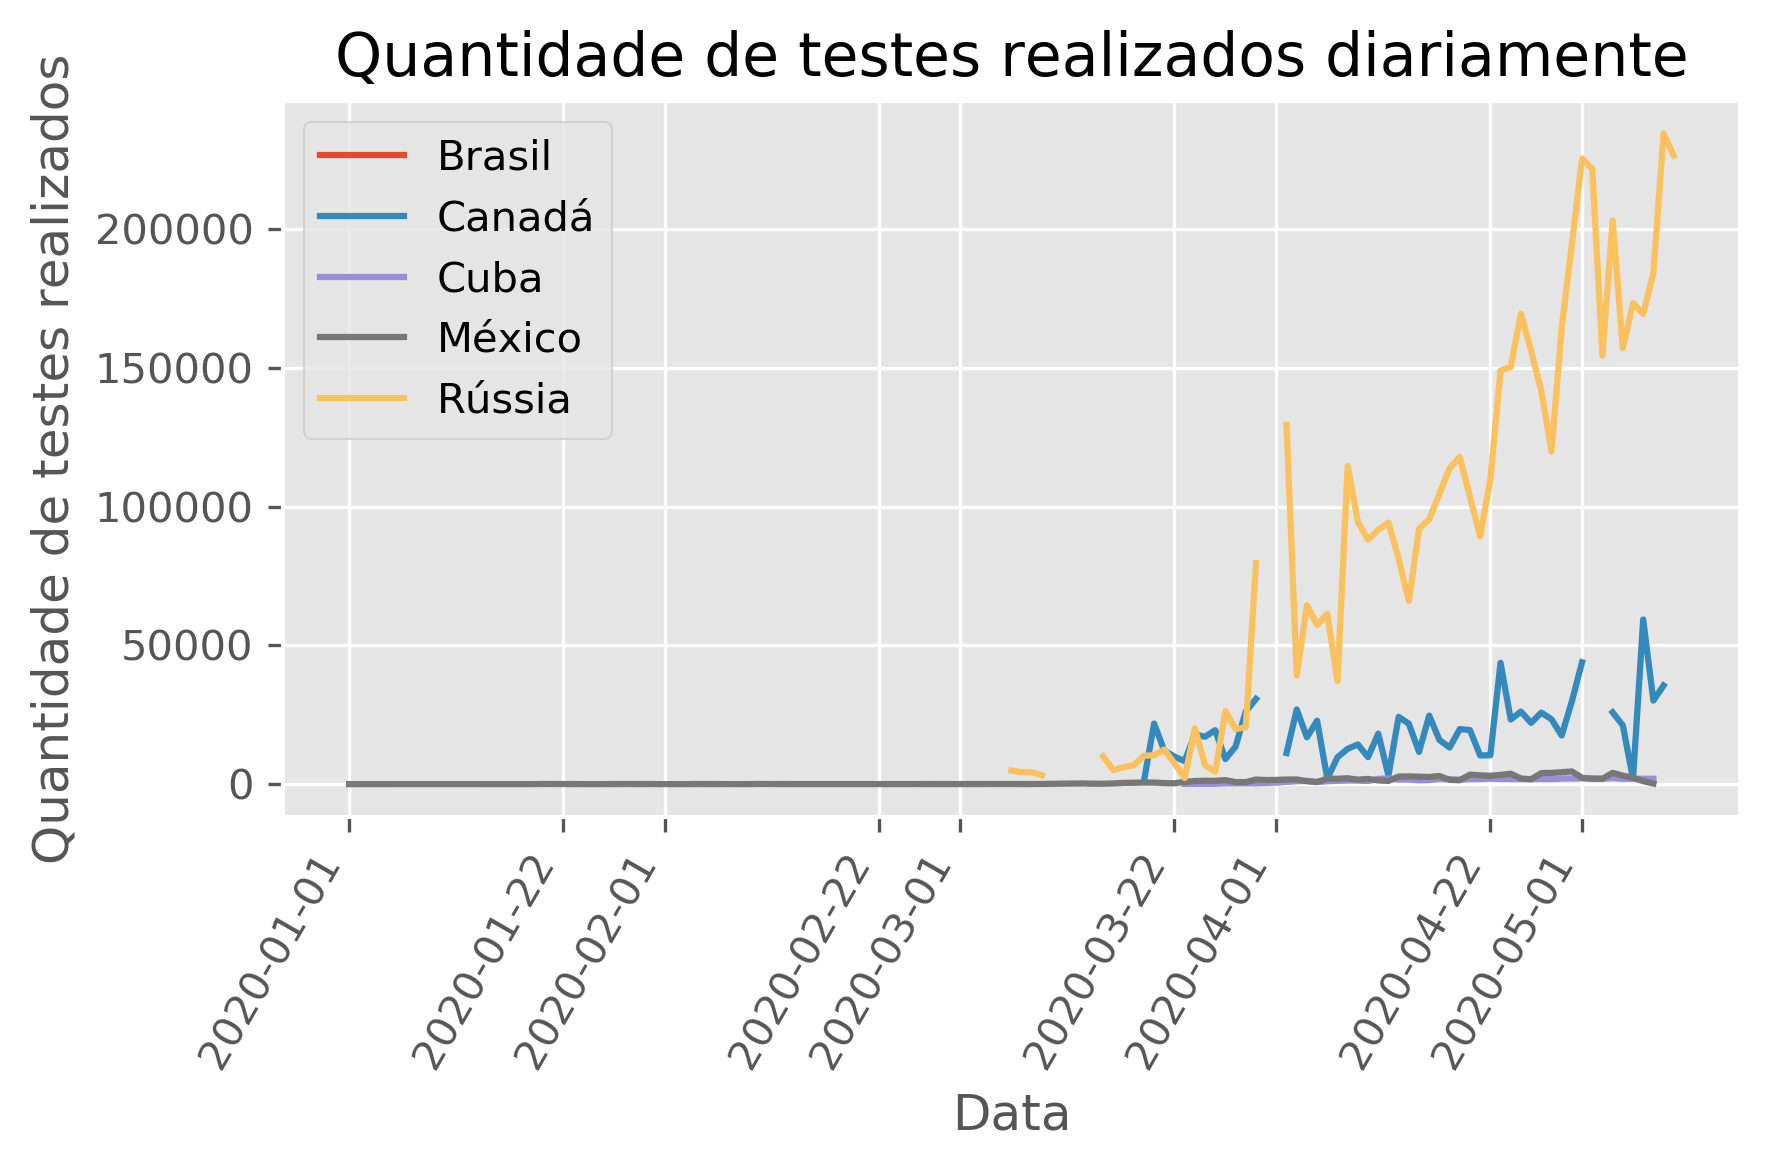

In [10]:
fig, ax = plt.subplots(dpi = 300)
legend = []

plt.setp(plt.gca().get_xticklabels(), rotation=60, ha="right")
for country in countries.groups:
    legend.append(NAMES[country])
    country_data = countries.get_group(country)
    
    plt.plot(country_data.date, country_data.new_tests)
    
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de testes realizados')
plt.title('Quantidade de testes realizados diariamente')
plt.tight_layout()
plt.legend(legend)
plt.show()

<hr>

### Histogramas

In [11]:
# tmp: Filtrando para remover alguns zeros
data_owd = data_owd[data_owd['date'] >= '2020-03-20']

In [12]:
labelerfnc = lambda x: NAMES[x]

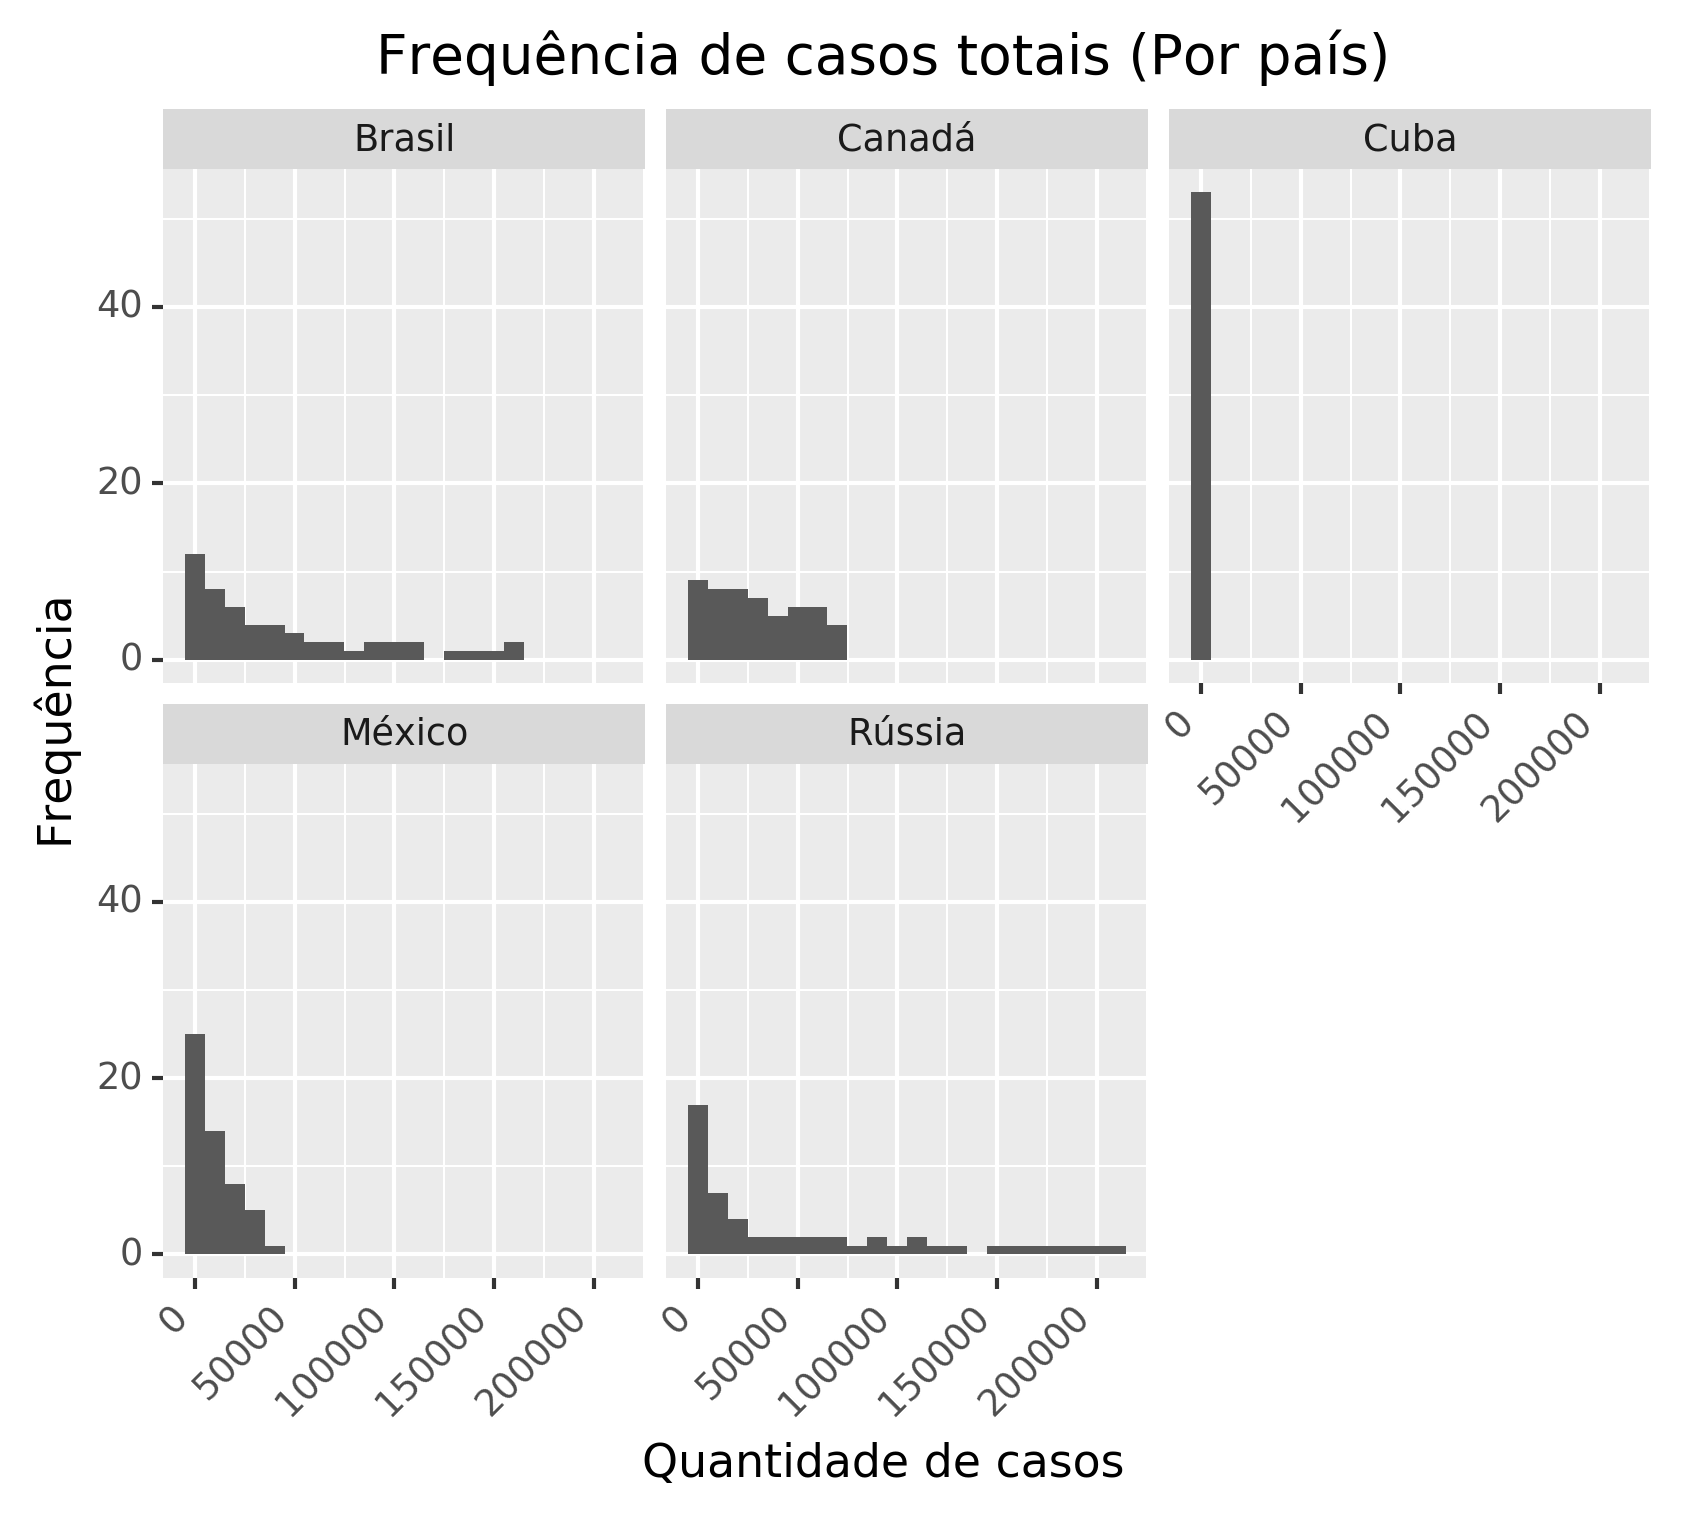

<ggplot: (8780242256886)>

In [13]:
(
    ggplot(data_owd, aes('total_cases'))
        + geom_histogram(bins = 22)
        + ggtitle('Frequência de casos totais (Por país)')
        + xlab('Quantidade de casos') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

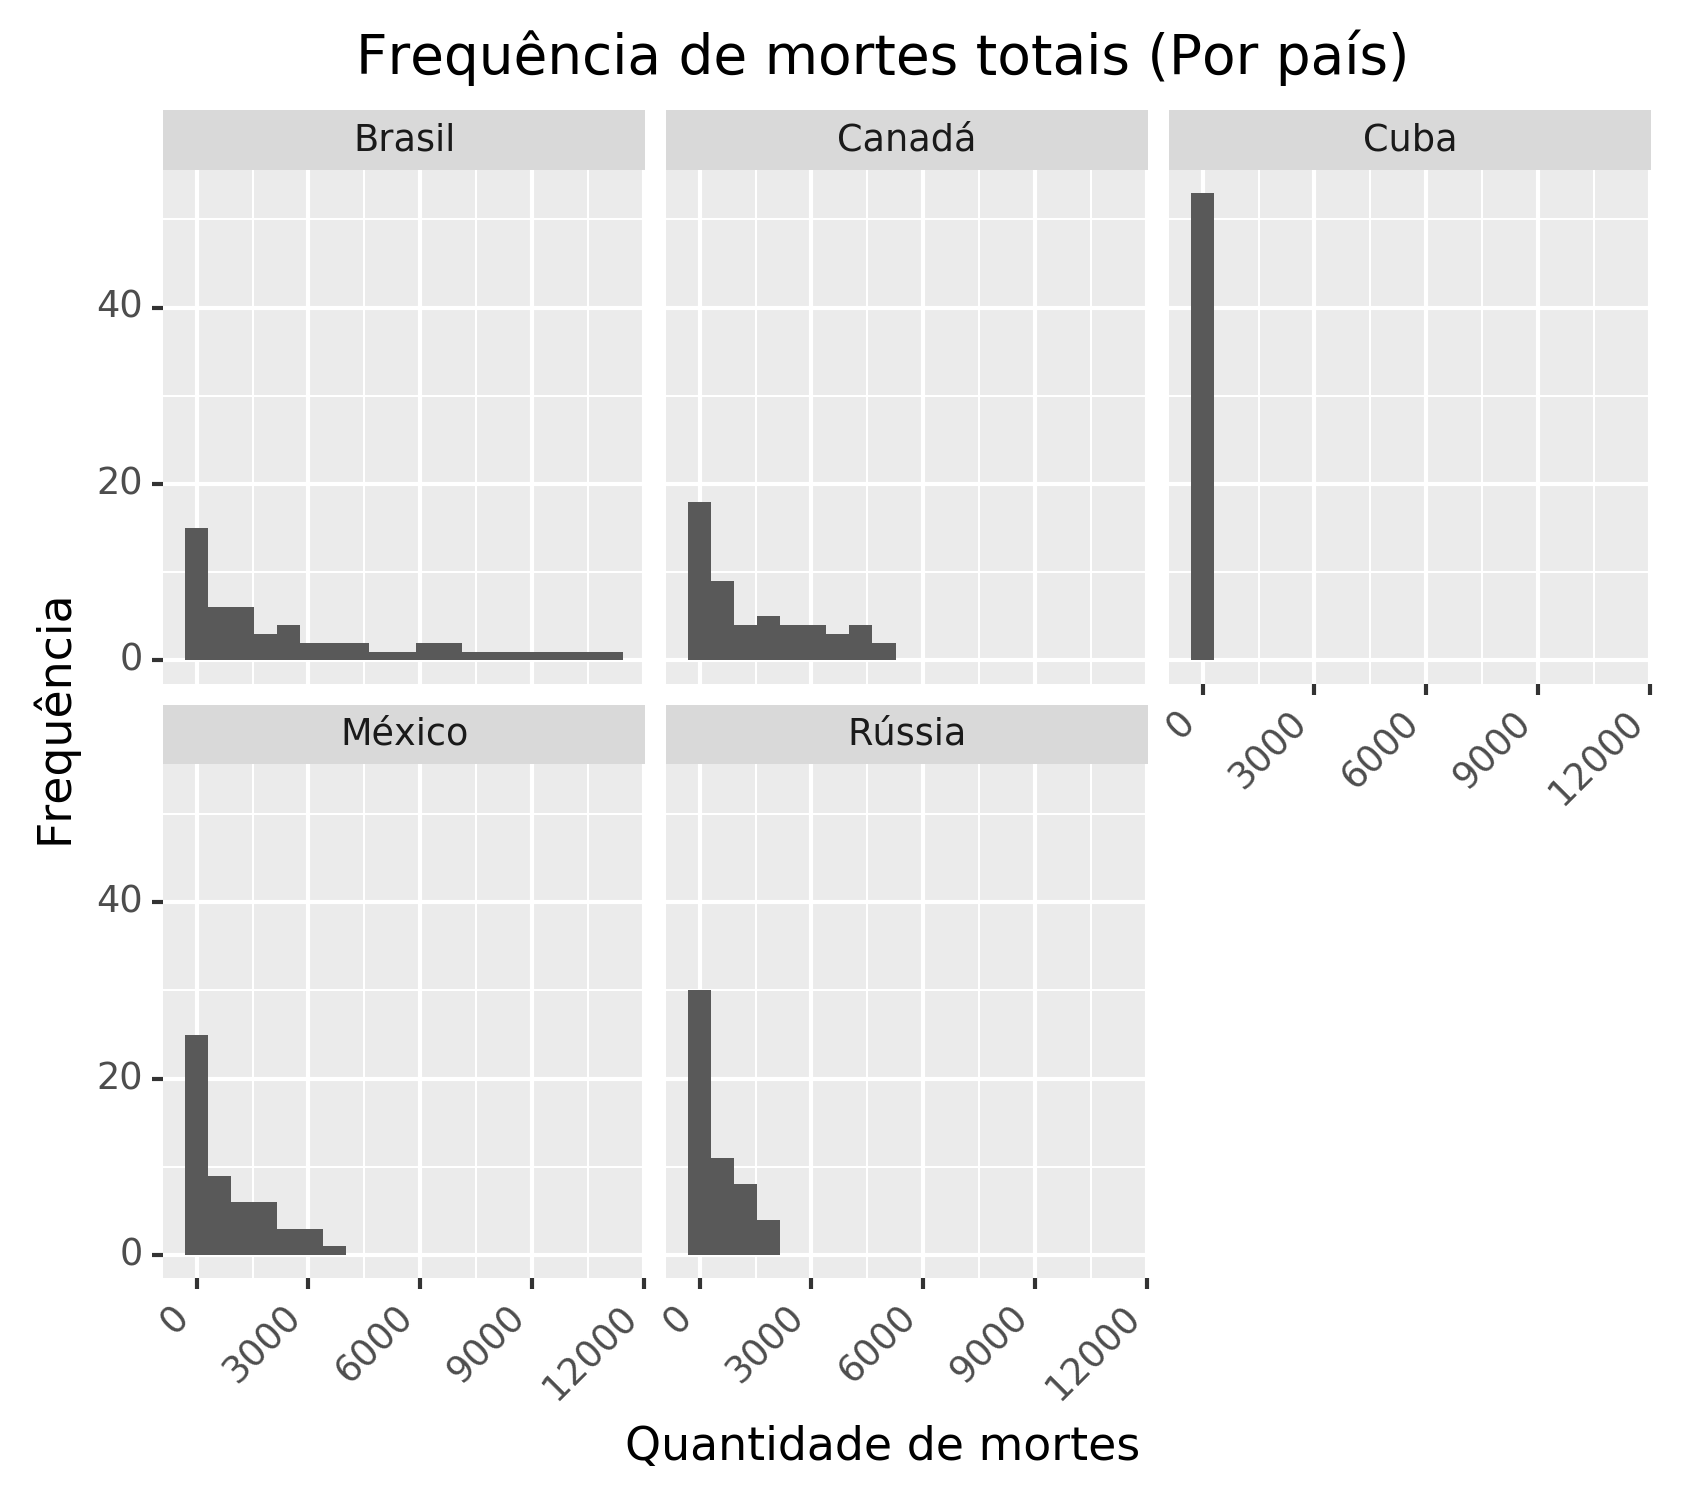

<ggplot: (8780239532387)>

In [14]:
(
    ggplot(data_owd, aes('total_deaths'))
        + geom_histogram(bins = 19)
        + ggtitle('Frequência de mortes totais (Por país)')
        + xlab('Quantidade de mortes') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 63 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


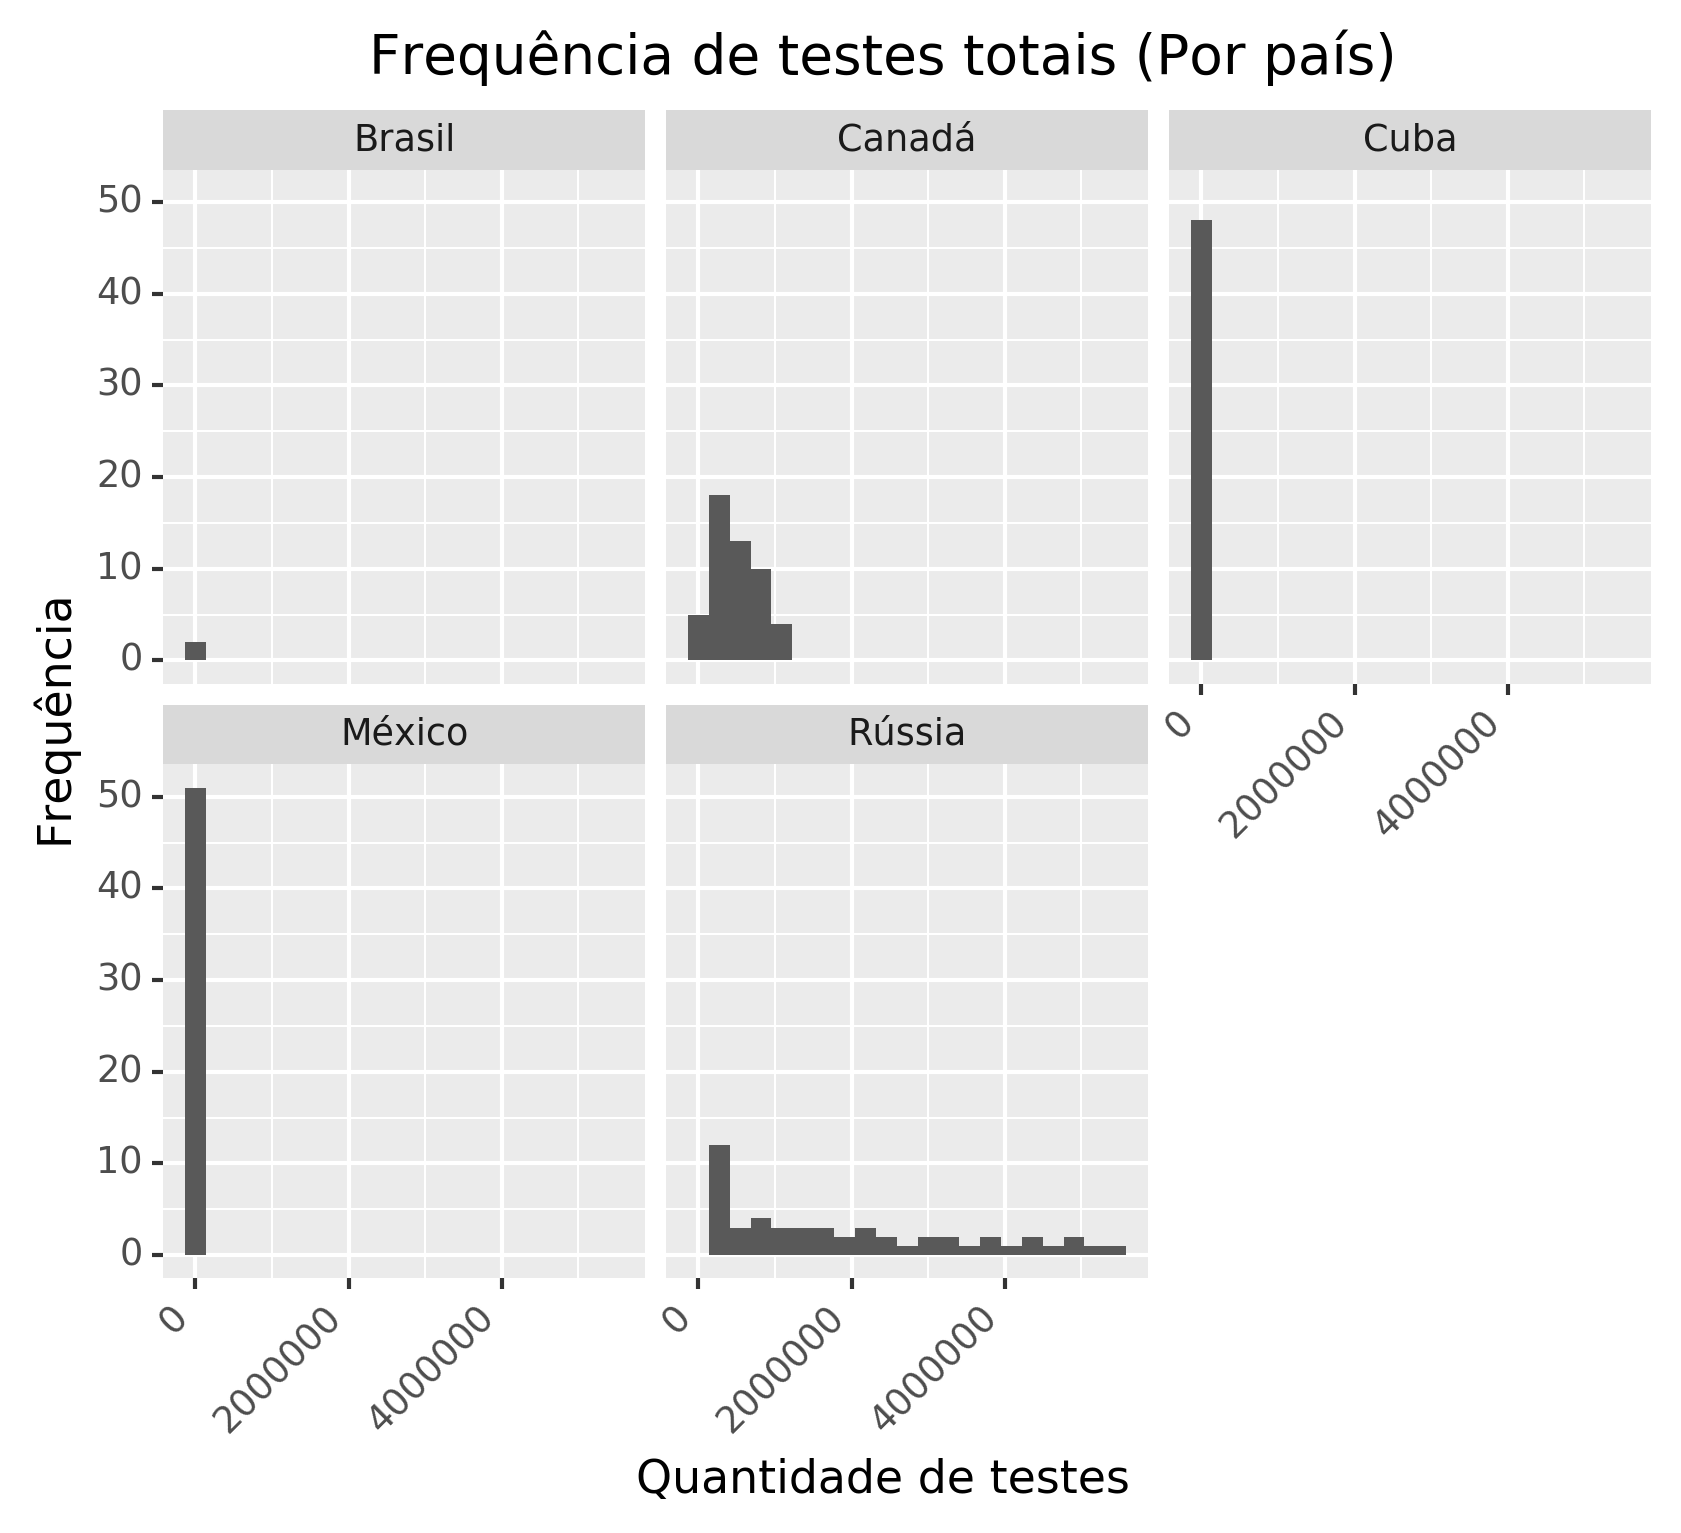

<ggplot: (-9223363256613762023)>

In [15]:
(
    ggplot(data_owd, aes('total_tests'))
        + geom_histogram(bins = 21)
        + ggtitle('Frequência de testes totais (Por país)')
        + xlab('Quantidade de testes') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

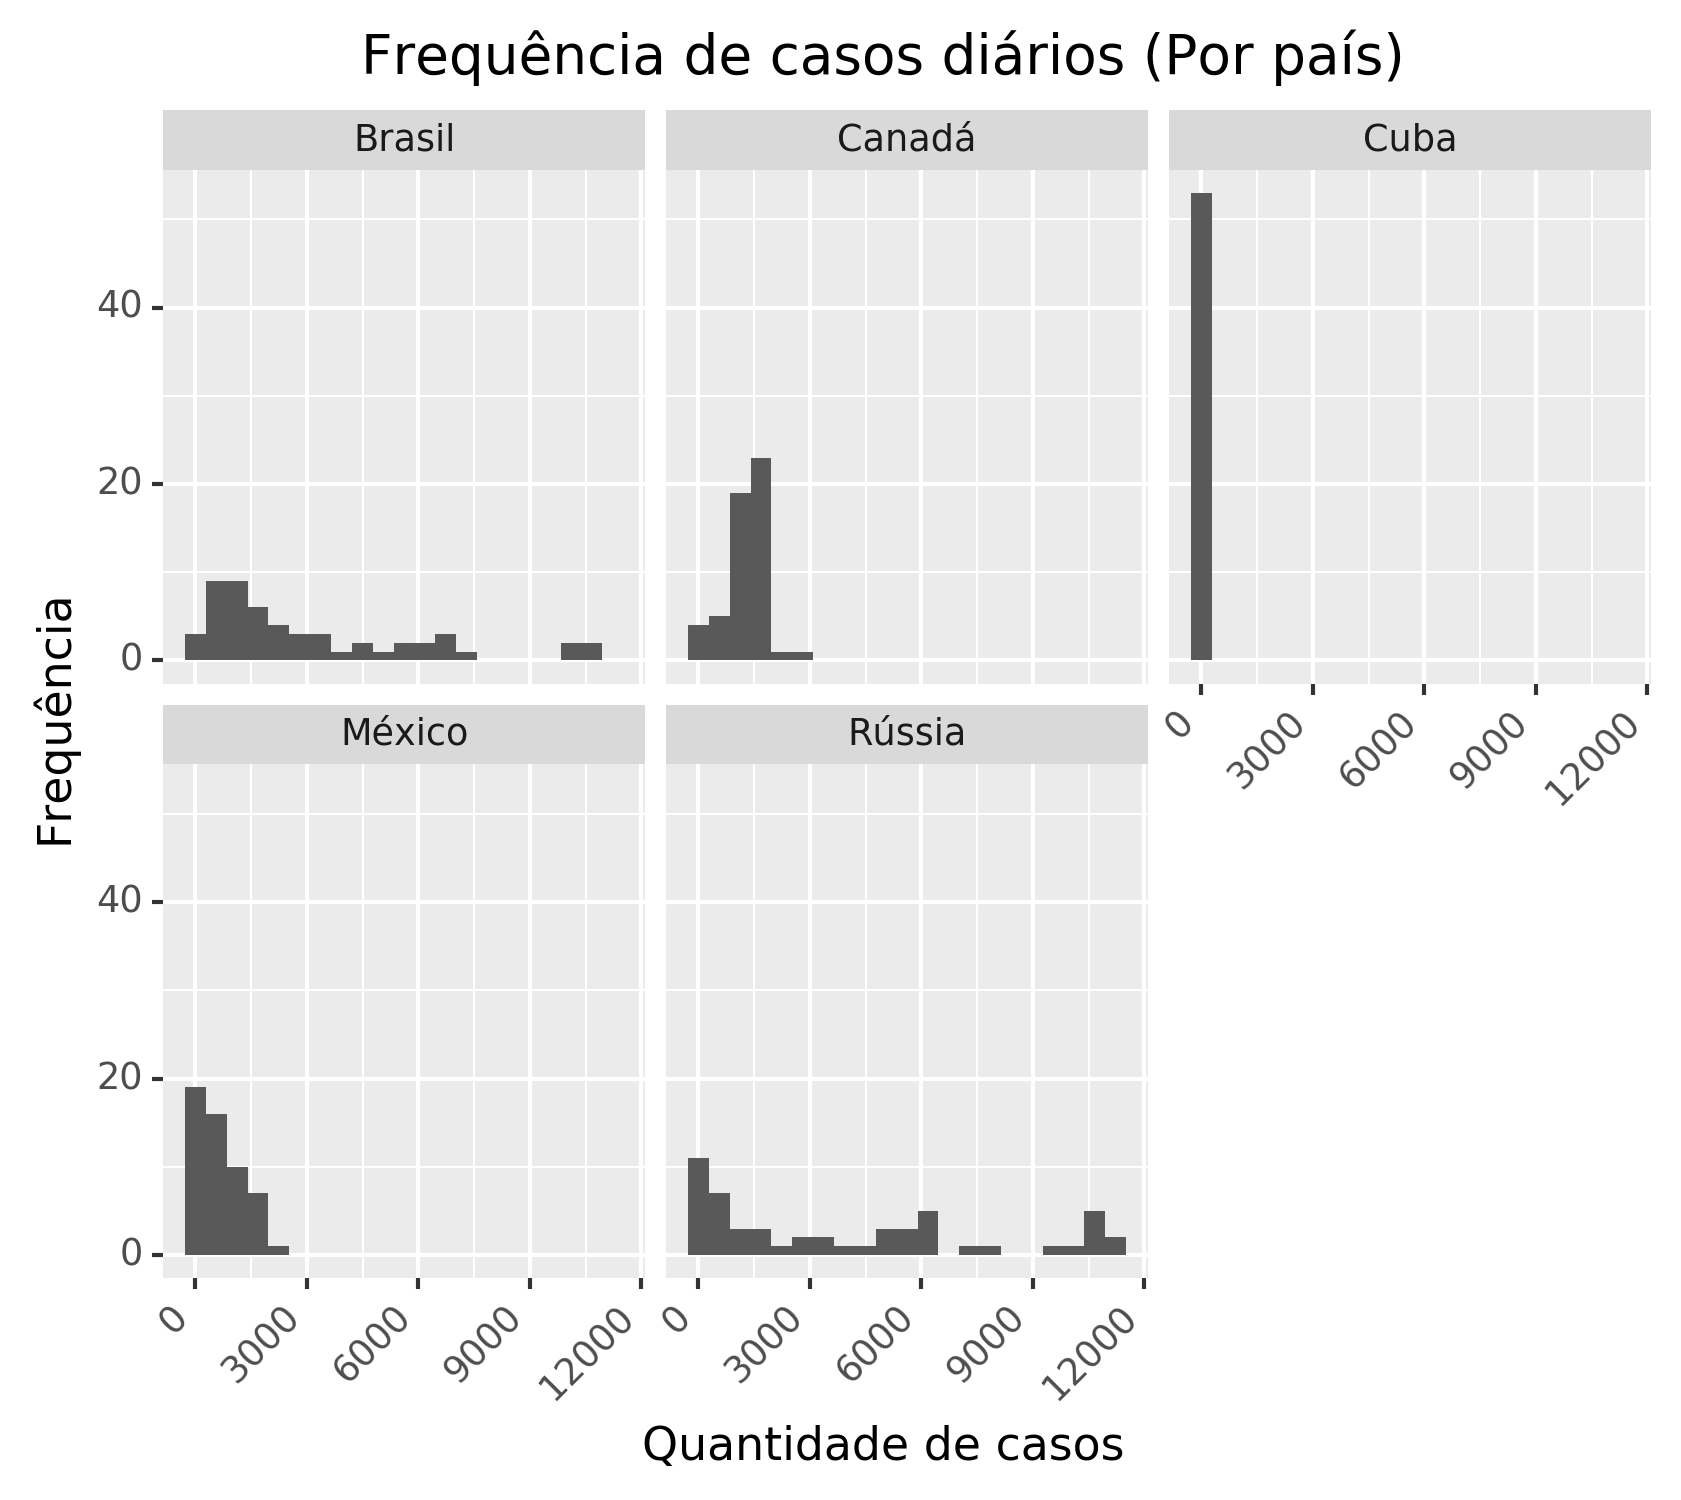

<ggplot: (8780240875079)>

In [16]:
(
    ggplot(data_owd, aes('new_cases'))
        + geom_histogram(bins = 21)
        + ggtitle('Frequência de casos diários (Por país)')
        + xlab('Quantidade de casos') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

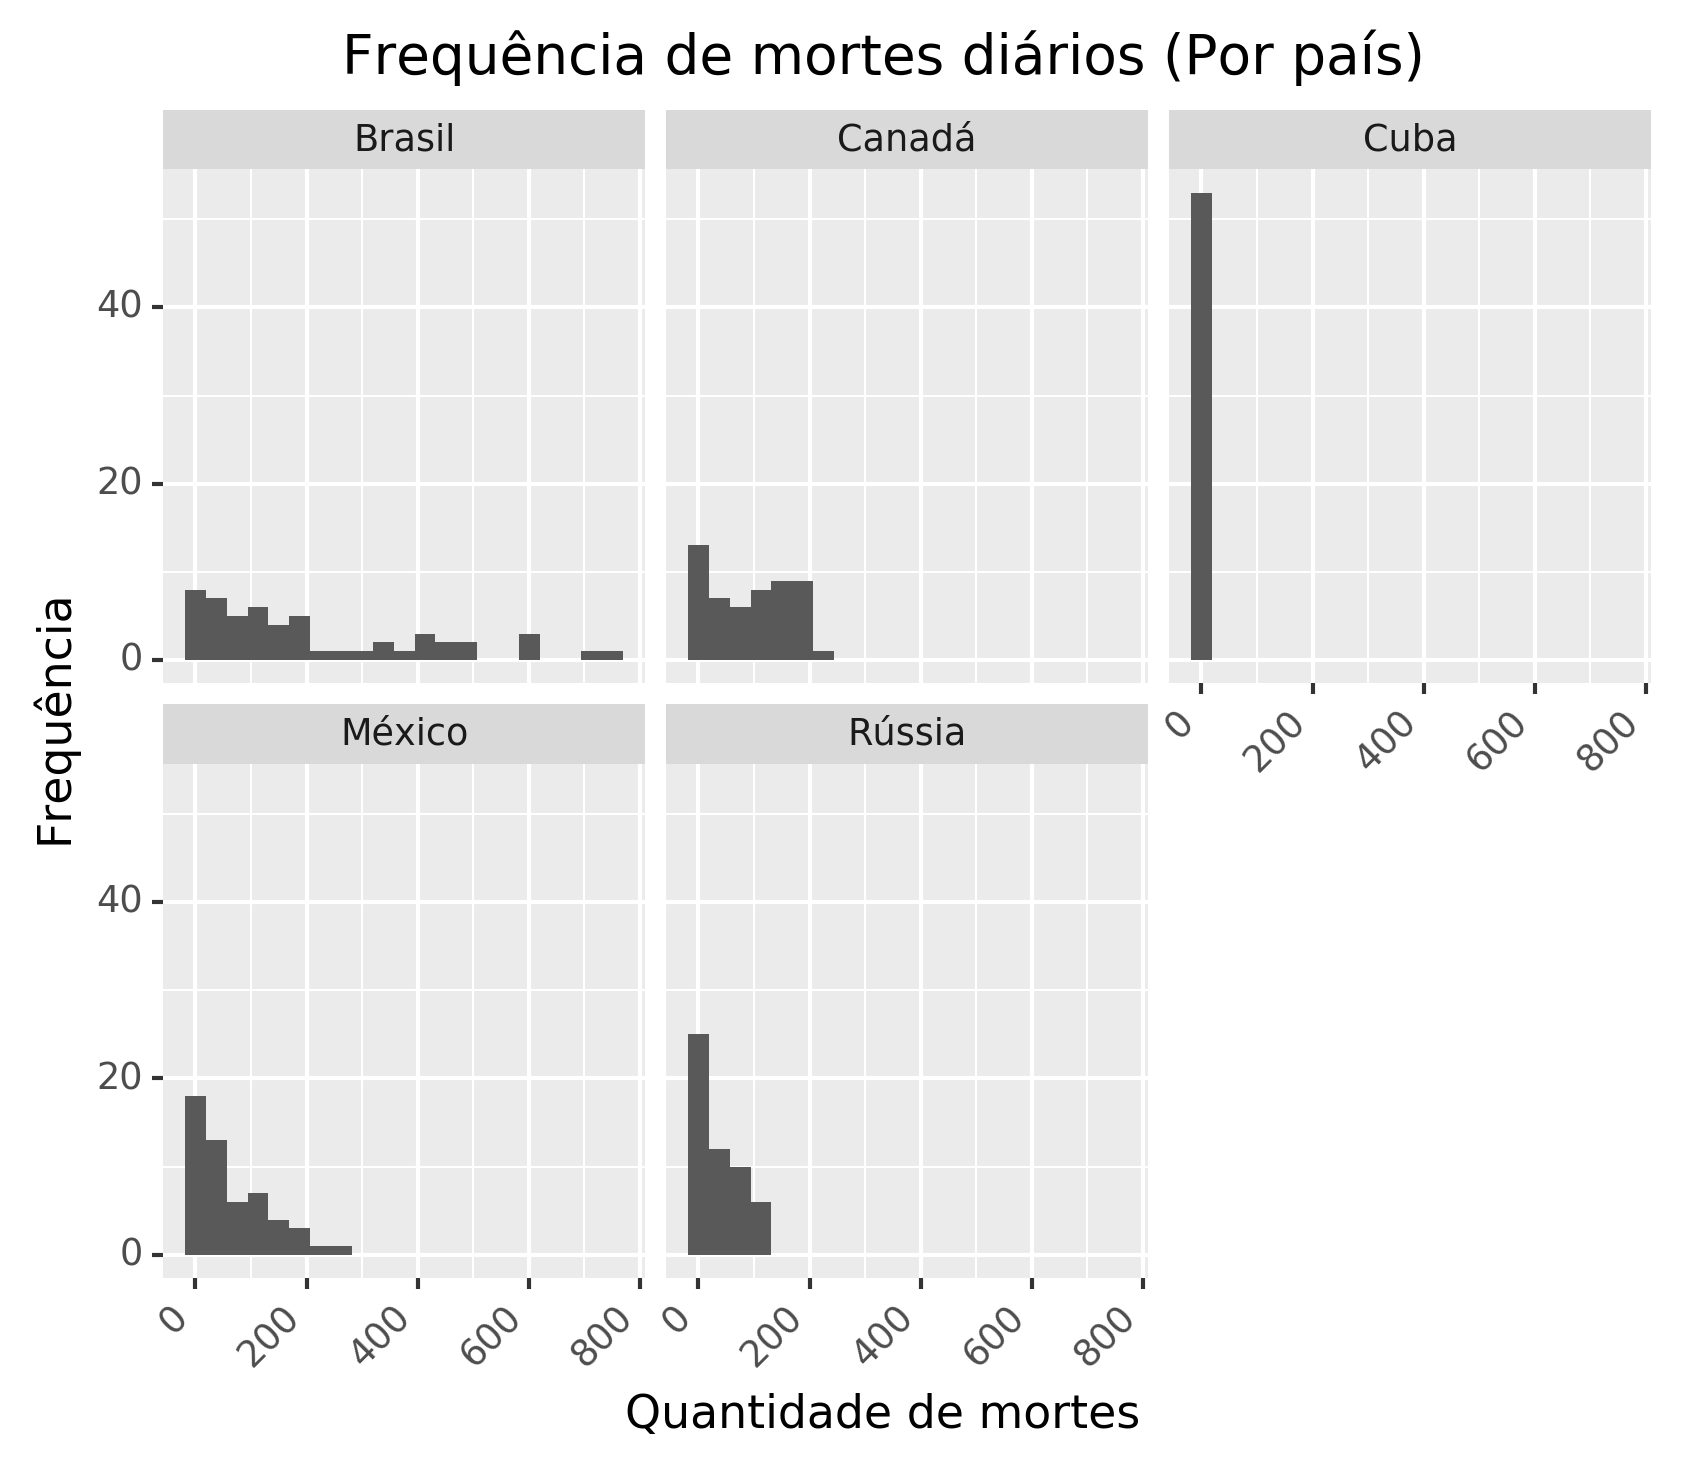

<ggplot: (-9223363256614056732)>

In [17]:
(
    ggplot(data_owd, aes('new_deaths'))
        + geom_histogram(bins = 21)
        + ggtitle('Frequência de mortes diários (Por país)')
        + xlab('Quantidade de mortes') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

/home/felipe/anaconda3/envs/matcomp-covid19/lib/python3.6/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 71 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


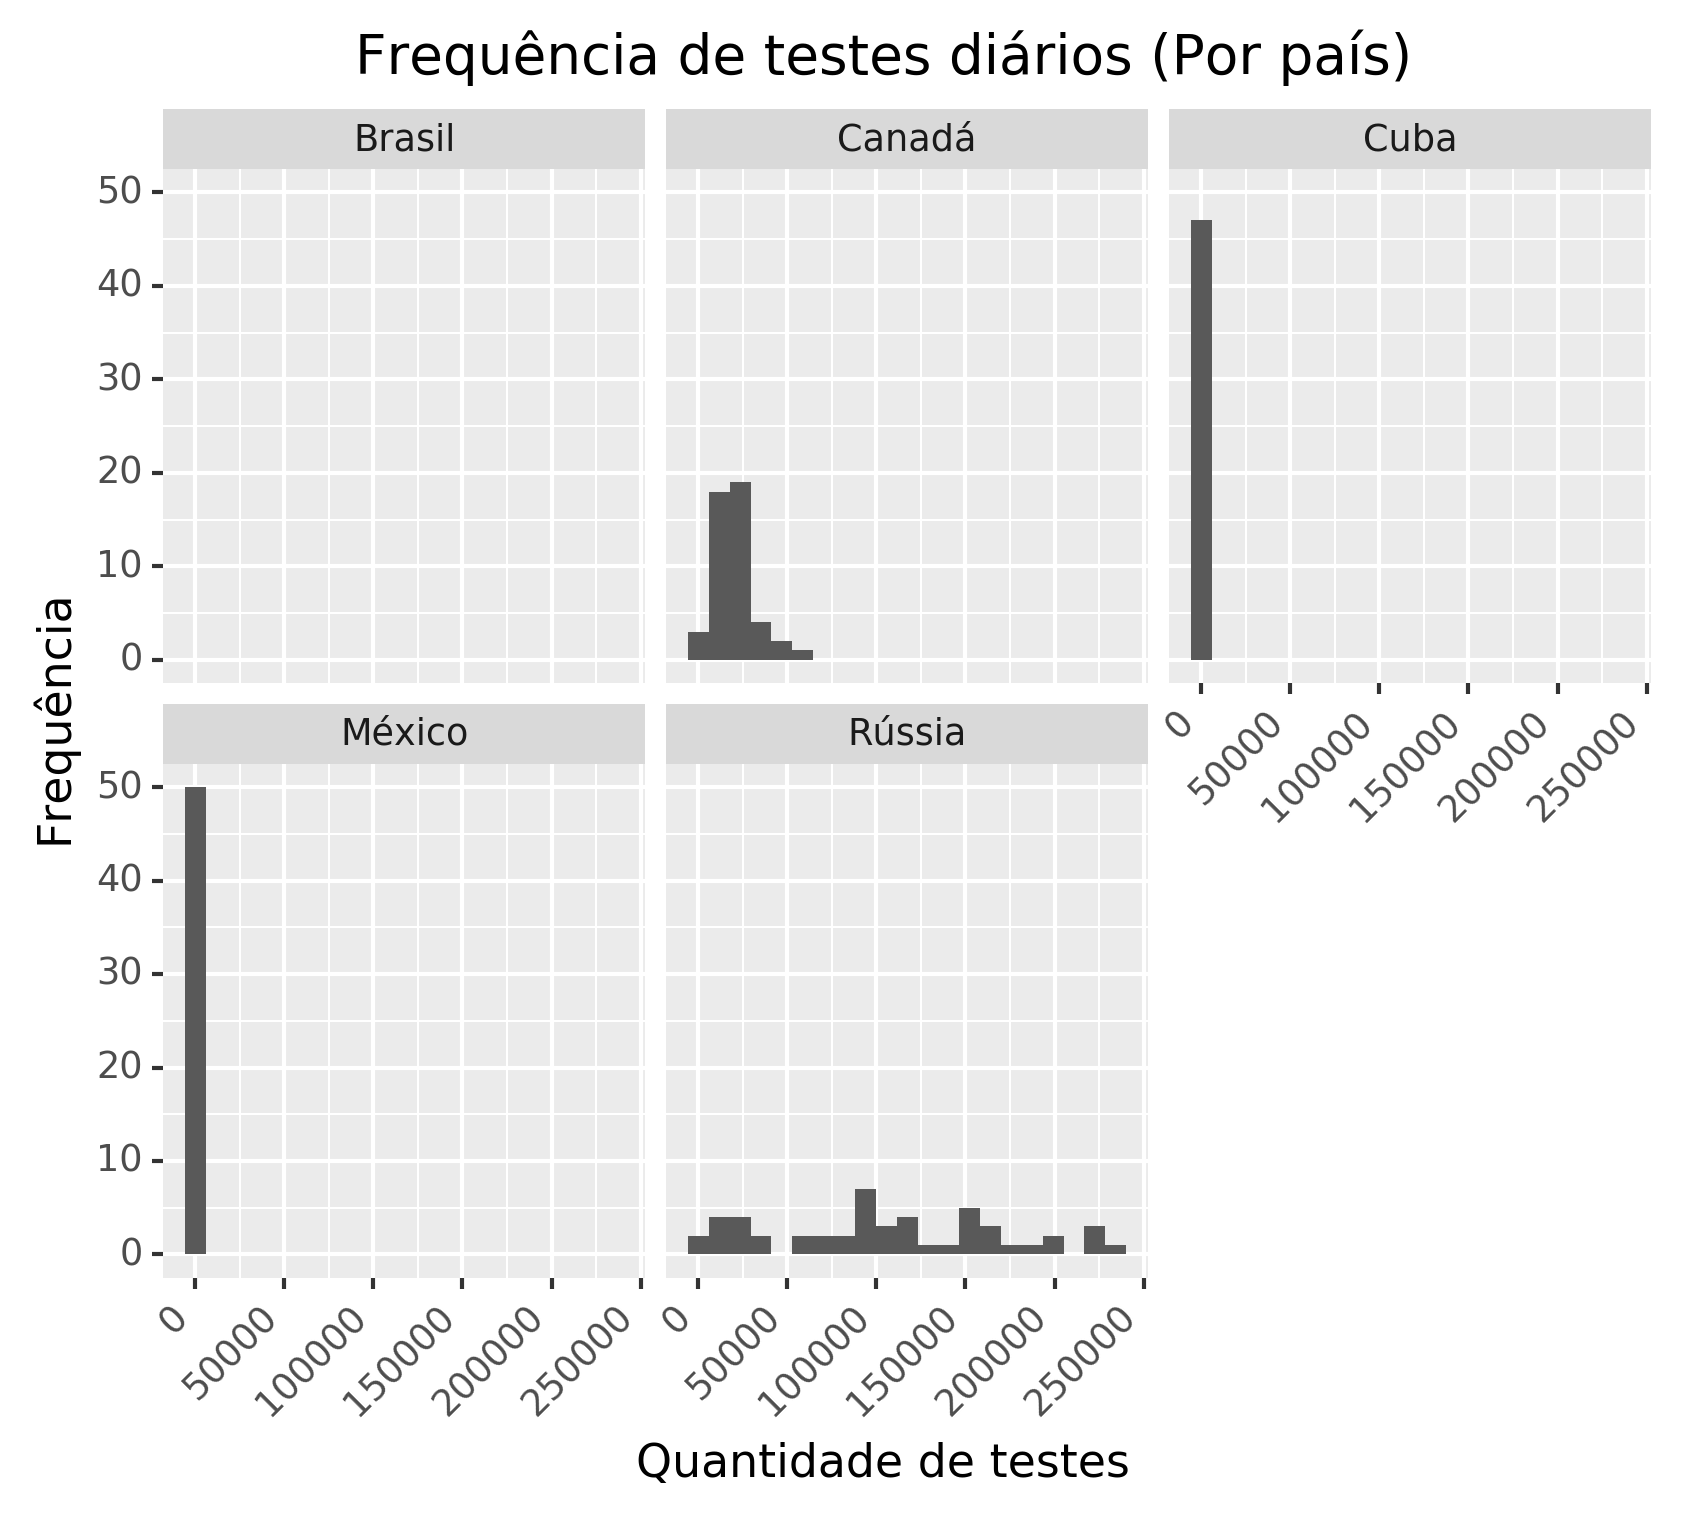

<ggplot: (8780240856973)>

In [18]:
(
    ggplot(data_owd, aes('new_tests'))
        + geom_histogram(bins = 21)
        + ggtitle('Frequência de testes diários (Por país)')
        + xlab('Quantidade de testes') + ylab('Frequência')
        + facet_wrap('~iso_code', labeller = labelerfnc)
        + theme(axis_text_x = element_text(angle = 45, hjust = 1), dpi = 300)
)

<hr>

### Espaço de Cullen-Frey e Função de Distribuição de Probabilidade (PDF)

A aplicação da classificação do espaço de Cullen-Frey foi feita através do pacote [interfacer](https://pypi.org/project/interfacer/).


In [19]:
import interfacer.descdist
import interfacer.jupyter_helper

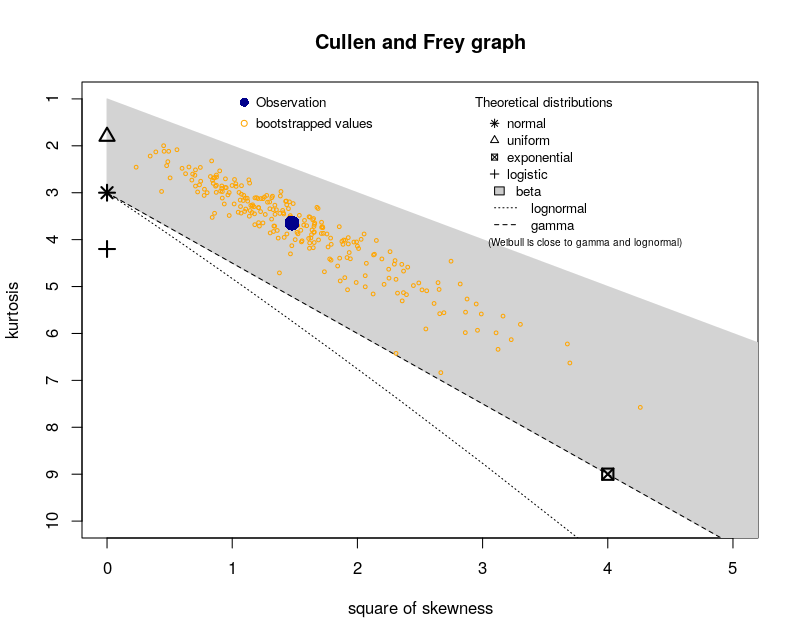

In [20]:
bra = data_owd[data_owd['iso_code'] == 'BRA']

with interfacer.jupyter_helper.cellplot(width=800, height=640):
    interfacer.descdist.descdist(bra.new_cases, boot = 250)